In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
# Load the data
data = pd.read_csv('Maternal Health Risk Data Set.csv')


NameError: name 'pd' is not defined

In [3]:
# Display basic information about the dataset
print(data.head())
print(data.info())
print(data.describe())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None
               Age   Systoli

In [4]:
# Encode the target variable
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
data['RiskLevel'] = data['RiskLevel'].map(risk_mapping)

In [5]:
# Separate features and target
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

In [6]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier(random_state=42))
]

In [9]:
# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, classification_report(y_test, y_pred)


In [10]:
# Evaluate all models
results = []
for name, model in models:
    accuracy, report = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append((name, accuracy))
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)



Logistic Regression:
Accuracy: 0.6502
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.89      0.73        80
           1       0.68      0.28      0.39        76
           2       0.70      0.85      0.77        47

    accuracy                           0.65       203
   macro avg       0.67      0.67      0.63       203
weighted avg       0.66      0.65      0.61       203


Decision Tree:
Accuracy: 0.8177
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        80
           1       0.77      0.84      0.81        76
           2       0.83      0.85      0.84        47

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203


Random Forest:
Accuracy: 0.8079
Classification Report:
              precision    recall  f1-score   support

         

In [12]:
# Neural Network model
def create_nn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [13]:
nn_model = create_nn_model((X_train_scaled.shape[1],))
history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Evaluate Neural Network
y_pred_nn = nn_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_nn, axis=1)
nn_accuracy = accuracy_score(y_test, y_pred_classes)
results.append(('Neural Network', nn_accuracy))

print("\nNeural Network:")
print(f"Accuracy: {nn_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Neural Network:
Accuracy: 0.6700
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.81      0.70        80
           1       0.71      0.39      0.51        76
           2       0.76      0.87      0.81        47

    accuracy                           0.67       203
   macro avg       0.69      0.69      0.67       203
weighted avg       0.68      0.67      0.65       203



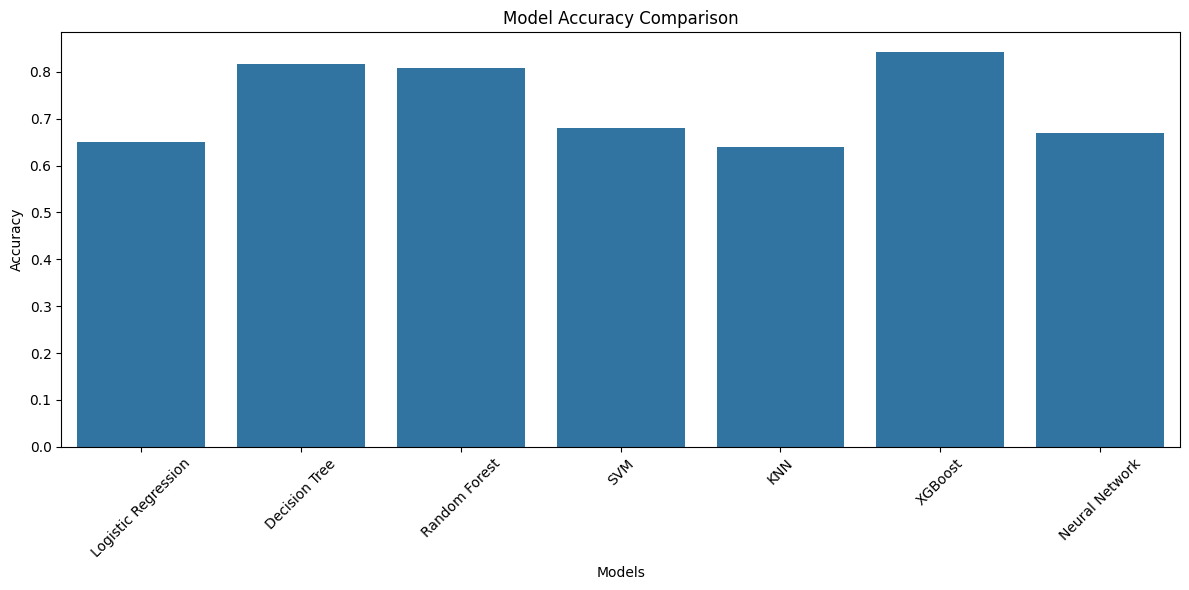

In [15]:
# Plot results
plt.figure(figsize=(12, 6))
models, accuracies = zip(*results)
sns.barplot(x=list(models), y=list(accuracies))
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

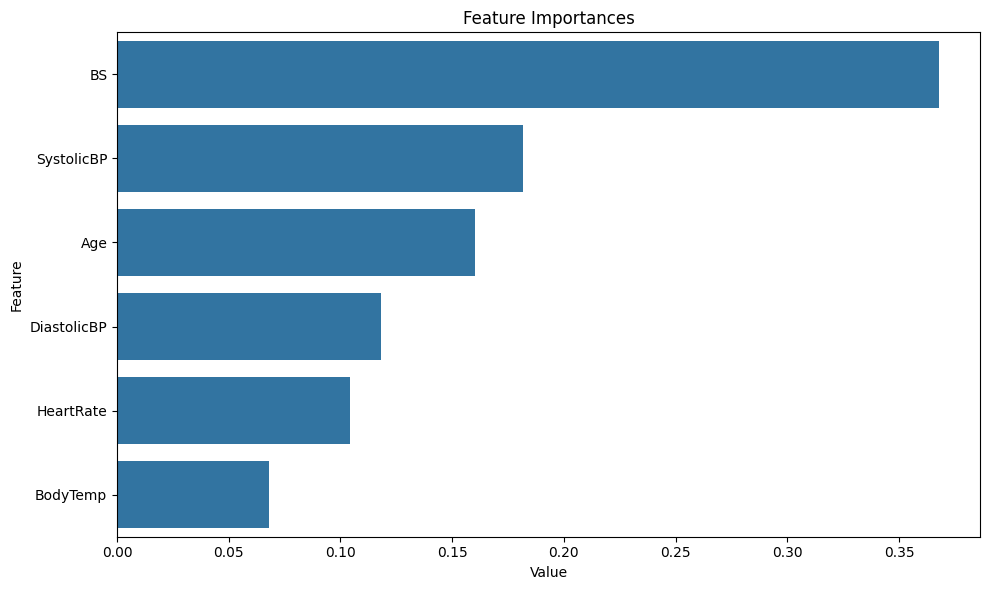

In [16]:
# Feature Importance (using Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
importances = rf_model.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(importances, X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

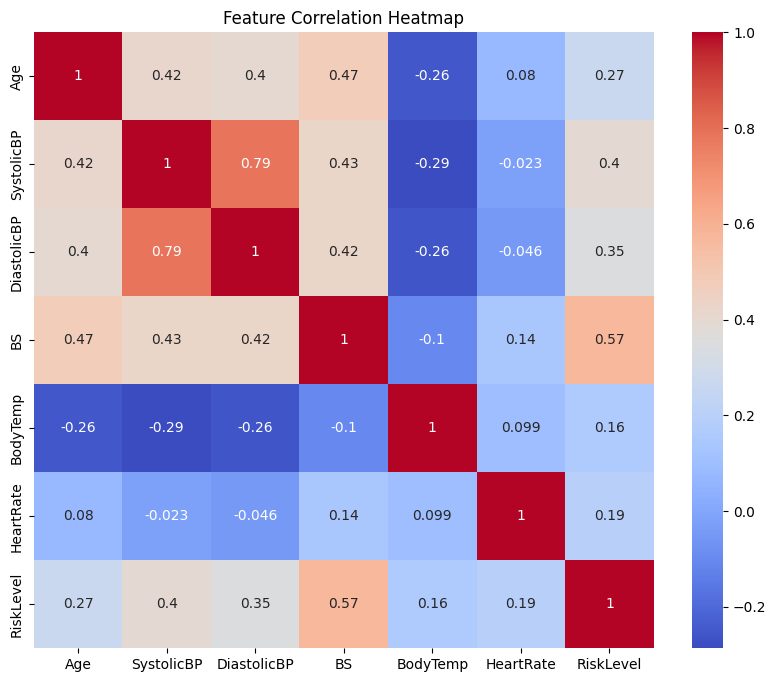

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [18]:
# Function to find similar patients
def find_similar_patients(patient_data, top_n=5):
    similarity = cosine_similarity(patient_data.reshape(1, -1), X_train_scaled)
    similar_indices = similarity.argsort()[0][::-1][1:top_n+1]
    return X_train.iloc[similar_indices], y_train.iloc[similar_indices]

In [19]:
# Function to predict risk and provide recommendations
def predict_and_recommend(model, scaler, patient_data):
    scaled_data = scaler.transform(patient_data)
    if isinstance(model, tf.keras.Model):
        prediction = model.predict(scaled_data)
        risk_level = np.argmax(prediction, axis=1)[0]
        risk_probs = prediction[0]
    else:
        risk_level = model.predict(scaled_data)[0]
        risk_probs = model.predict_proba(scaled_data)[0]
    
    risk_mapping = {0: 'Low Risk', 1: 'Mid Risk', 2: 'High Risk'}
    predicted_risk = risk_mapping[risk_level]
    
    print(f"Predicted Risk Level: {predicted_risk}")
    print(f"Risk Probabilities: Low - {risk_probs[0]:.2f}, Mid - {risk_probs[1]:.2f}, High - {risk_probs[2]:.2f}")
    
    similar_patients, similar_risks = find_similar_patients(scaled_data)
    print("\nSimilar Patient Profiles:")
    print(similar_patients)
    print("\nRisk Levels of Similar Patients:")
    print(similar_risks)
    
    recommendations = {
        0: ["Continue regular check-ups", "Maintain a balanced diet", "Stay active with light exercises"],
        1: ["Increase frequency of check-ups", "Monitor blood pressure closely", "Consult about specific dietary needs"],
        2: ["Frequent monitoring required", "Possible bed rest", "Immediate consultation with specialist"]
    }
    
    print("\nRecommendations based on risk level:")
    for rec in recommendations[risk_level]:
        print(f"- {rec}")


In [33]:



def predict_and_recommend(model, scaler, patient_data):
    scaled_data = scaler.transform(patient_data)
    
    if isinstance(model, tf.keras.Model):
        prediction = model.predict(scaled_data)
        risk_level = np.argmax(prediction, axis=1)[0]
        risk_probs = prediction[0]
    else:
        risk_level = model.predict(scaled_data)[0]
        risk_probs = model.predict_proba(scaled_data)[0]
    
    risk_mapping = {0: 'Low Risk', 1: 'Mid Risk', 2: 'High Risk'}
    predicted_risk = risk_mapping[risk_level]
    
    print(f"Predicted Risk Level: {predicted_risk}")
    print(f"Risk Probabilities: Low - {risk_probs[0]:.2f}, Mid - {risk_probs[1]:.2f}, High - {risk_probs[2]:.2f}")
    
    similar_patients, similar_risks = find_similar_patients(scaled_data)
    print("\nSimilar Patient Profiles:")
    print(similar_patients)
    print("\nRisk Levels of Similar Patients:")
    print(similar_risks)
    
    recommendations = {
        0: ["Continue regular check-ups", "Maintain a balanced diet", "Stay active with light exercises"],
        1: ["Increase frequency of check-ups", "Monitor blood pressure closely", "Consult about specific dietary needs"],
        2: ["Frequent monitoring required", "Possible bed rest", "Immediate consultation with specialist"]
    }
    
    print("\nRecommendations based on risk level:")
    for rec in recommendations[risk_level]:
        print(f"- {rec}")

In [38]:
# After training and evaluating all models

print("\nModel Results:")
for name, accuracy in results:
    print(f"{name}: {accuracy:.4f}")

print("\nAvailable Models:")
for name, model in models:
    print(f"{name}: {type(model).__name__}")

# Select the best model
best_model_name, best_accuracy = max(results, key=lambda x: x[1])

print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Find the best model object
if best_model_name == 'Neural Network':
    best_model = nn_model
    print("Using Neural Network model")
else:
    try:
        best_model = next(model for name, model in models if name == best_model_name)
        print(f"Found model: {type(best_model).__name__}")
    except StopIteration:
        print(f"Could not find exact match for {best_model_name}")
        # Try to find a close match
        best_model = next((model for name, model in models if best_model_name in name), None)
        if best_model:
            print(f"Found close match: {type(best_model).__name__}")
        else:
            raise ValueError(f"Could not find model object for {best_model_name}")

# Example usage
print("\nPrediction for a new patient:")
new_patient = np.array([[35, 120, 80, 7.5, 98.5, 75]])  # Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate
predict_and_recommend(best_model, scaler, new_patient)


Model Results:
Logistic Regression: 0.6502
Decision Tree: 0.8177
Random Forest: 0.8079
SVM: 0.6798
KNN: 0.6404
XGBoost: 0.8424

Available Models:
Logistic Regression: LogisticRegression
Decision Tree: DecisionTreeClassifier
Random Forest: RandomForestClassifier
SVM: SVC
KNN: KNeighborsClassifier
XGBoost: XGBClassifier

Best Model: XGBoost
Best Accuracy: 0.8424
Found model: XGBClassifier

Prediction for a new patient:
Predicted Risk Level: Low Risk
Risk Probabilities: Low - 0.99, Mid - 0.01, High - 0.00

Similar Patient Profiles:
     Age  SystolicBP  DiastolicBP   BS  BodyTemp  HeartRate
335   35         120           80  6.9      98.0         78
78    35         120           80  6.9      98.0         78
169   49         120           90  7.2      98.0         77
28    49         120           90  7.2      98.0         77
722   50         140           80  6.7      98.0         70

Risk Levels of Similar Patients:
335    1
78     1
169    0
28     0
722    1
Name: RiskLevel, dtype: i

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
# New patient sample
new_patient = np.array([[42, 135, 88, 9.5, 99.2, 82]])  # Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate

print("New Patient Details:")
print(f"Age: {new_patient[0][0]} years")
print(f"Systolic Blood Pressure: {new_patient[0][1]} mmHg")
print(f"Diastolic Blood Pressure: {new_patient[0][2]} mmHg")
print(f"Blood Sugar: {new_patient[0][3]} mmol/L")
print(f"Body Temperature: {new_patient[0][4]} °F")
print(f"Heart Rate: {new_patient[0][5]} bpm")

print("\nPrediction and Recommendations:")
predict_and_recommend(best_model, scaler, new_patient)

# Additional analysis
similar_patients, similar_risks = find_similar_patients(scaler.transform(new_patient))

print("\nDetailed Analysis of Similar Patients:")
for i, (patient, risk) in enumerate(zip(similar_patients.iterrows(), similar_risks), 1):
    _, data = patient
    risk_level = ['Low Risk', 'Mid Risk', 'High Risk'][risk]
    print(f"\nSimilar Patient {i}:")
    print(f"Age: {data['Age']} years")
    print(f"Systolic BP: {data['SystolicBP']} mmHg")
    print(f"Diastolic BP: {data['DiastolicBP']} mmHg")
    print(f"Blood Sugar: {data['BS']} mmol/L")
    print(f"Body Temperature: {data['BodyTemp']} °F")
    print(f"Heart Rate: {data['HeartRate']} bpm")
    print(f"Risk Level: {risk_level}")

print("\nStatistical Comparison:")
for column in X.columns:
    avg_value = X[column].mean()
    patient_value = new_patient[0][X.columns.get_loc(column)]
    difference = patient_value - avg_value
    print(f"{column}:")
    print(f"  Patient: {patient_value:.2f}")
    print(f"  Dataset Average: {avg_value:.2f}")
    print(f"  Difference: {difference:.2f}")
    print(f"  {'Above' if difference > 0 else 'Below'} average by {abs(difference/avg_value)*100:.2f}%")
    print()

New Patient Details:
Age: 42.0 years
Systolic Blood Pressure: 135.0 mmHg
Diastolic Blood Pressure: 88.0 mmHg
Blood Sugar: 9.5 mmol/L
Body Temperature: 99.2 °F
Heart Rate: 82.0 bpm

Prediction and Recommendations:
Predicted Risk Level: High Risk
Risk Probabilities: Low - 0.00, Mid - 0.00, High - 1.00

Similar Patient Profiles:
     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
114   63         140           90  15.0      98.0         90
502   63         140           90  15.0      98.0         90
16    50         140           90  15.0      98.0         90
681   50         140           90  15.0      98.0         90
106   50         140           90  15.0      98.0         90

Risk Levels of Similar Patients:
114    2
502    2
16     2
681    2
106    2
Name: RiskLevel, dtype: int64

Recommendations based on risk level:
- Frequent monitoring required
- Possible bed rest
- Immediate consultation with specialist

Detailed Analysis of Similar Patients:

Similar Patient 1:
Age: 63

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

# Assuming 'results' contains your model results
best_model_name, best_accuracy = max(results, key=lambda x: x[1])
best_model = next(model for name, model in models if name == best_model_name)

# Save the best model
joblib.dump(best_model, 'best_model.joblib')

# Save the scaler
joblib.dump(scaler, 'scaler.jobib')

print(f"Best model ({best_model_name}) and scaler have been saved.")